In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import homogeneity_score
from sympy import Point, Line
from sklearn.preprocessing import StandardScaler

In [2]:
%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv('~/MasterThesis/Data/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribute to Integer**

In [5]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])
true_labels=np.array(df["species"])

**Feature Scaling**

In [6]:
scaler = StandardScaler()
sample = scaler.fit_transform(df.iloc[:,0:4])

**Elbow Implimentation Using Homogenity Score**

*Reference : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html ,  
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1590054/
*

In [13]:
homogenity={}
K = range(1,11)
for k in K :
    homogenity[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    print('Number of clusters ='+str(k))
    print('predicted Labels = ')
    print(labels)
    print('true labels =')
    print(true_labels)
    #print(sample_transformed)
    homogenity[k]= homogeneity_score(true_labels,labels)
    print("score ="+str(homogenity[k]))

Number of clusters =1
predicted Labels = 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
true labels =
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
score =-4.547558462931499e-16
Number of clusters =2
predicted Labels = 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

**Ploting Elbow**

In [14]:
homo_array=[]
slope=[]
for key,value in homogenity.items():
    homo_array.append(value)
print(homo_array)

#Calculate slope of each line
for p in range(1,10):
    s= (homo_array[p]-homo_array[p-1])
    slope.append([p+1,s])
#slope

[-4.547558462931499e-16, 0.5793801642856945, 0.6591265018049008, 0.6412509939057984, 0.7465020069391011, 0.7465020069391011, 0.7902567944545102, 0.7141110111286837, 0.8447801215835133, 0.845944527077095]


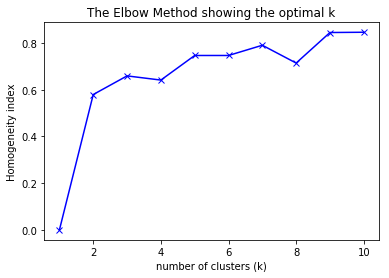

In [15]:
plt.plot(K,homo_array,'bx-')
plt.xlabel('number of clusters (k)')
plt.ylabel('Homogeneity index')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [16]:
slope

[[2, 0.5793801642856949],
 [3, 0.07974633751920635],
 [4, -0.017875507899102416],
 [5, 0.10525101303330264],
 [6, 0.0],
 [7, 0.04375478751540918],
 [8, -0.07614578332582655],
 [9, 0.13066911045482965],
 [10, 0.001164405493581655]]

In [17]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,8):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 3
Optimal Number of Clusters = 5
Optimal Number of Clusters = 7


In [18]:
distances=[]
for i in range(0,10):
    p1=Point(1,homo_array[0])
    p2=Point(10,homo_array[9])
    l1 = Line(p1,p2)
    p=Point(i+1,homo_array[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+1))

Optimal number 0f clusters = 2
